# Análise Exploratória Playlist Spotify

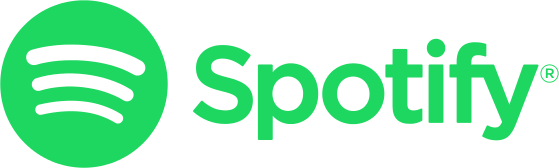

# Objetivos:

Descobrir:
- Artistas mais frequentes e lista de artistas
- Albums mais frequente
- Quantas músicas foram adicionadas em cada ano
- Décadas mais presentes
- gravadoras mais presentes


## Etapas:

1. Obtenção dos Dados
2. Limpeza dos Dados
3. Análise Exploratória

## 1. Obtenção dos dados

Os dados foram obtidos com o site skiley, cujo endereço é: https://skiley.net/ <br>
Basta fazer o login, procurar sua(s) playlists e clicar na opção "exportar" e salvar como CSV. 

In [1]:
#importar as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#permitir visualizar todas as colunas
pd.options.display.max_columns = None

#renderizar os gráficos diretamente no notebook
#%matplotlib inline

In [2]:
# Carregar a playlist com o pandas e ignorar linhas com erro com o parâmetro error_bad_lines = False
playlist = pd.read_csv('daboa.csv',encoding='latin1', error_bad_lines=False)

b'Skipping line 202: expected 23 fields, saw 24\nSkipping line 203: expected 23 fields, saw 24\nSkipping line 204: expected 23 fields, saw 24\nSkipping line 205: expected 23 fields, saw 24\n'


## Dicionário dos Dados

- <b>trackName</b>: Nome da música.
- <b>artistName</b>: Nome do artista.
- <b>albumName</b>: Nome do Album.
- <b>trackDuration</b>: Duração da Música
- <b>trackNumber</b>: Número da música na playlist.
- <b>addedBy </b>: Pessoa que colocou a música na playlist.
- <b>addedAt </b>: Data que a música foi adicionada. 
- <b>isLocal</b>: Todos os valores dessa coluna são o mesmo: "stream".
- <b>trackPopularity</b>: Popularidade da música.
- <b>artistPopularity</b>: Popularidade do artista no spotify.
- <b>secondaryArtistsNames</b>: Artistas secundários (convidados, feat.)
- <b>albumPopularity</b>: Popularidade do Album.
- <b>artistFollowers</b>: Quantidade de seguidores do artista.
- <b>artistGenres</b>: Generos do Artista.
- <b>albumType</b>: Tipo de album (album, single, compilation).
- <b>albumRecordLabel</b>: Gravadora do album.
- <b>albumReleaseDate</b>: Ano do album.
- <b>albumArtistsNames</b>: Nome da banda.
- <b>trackUrl</b>: Link da música.
- <b>artistUrl</b>: Link do artista.
- <b>albumUrl </b>: Link do album. 
- <b>tackIsrc</b>:  Id da música (?).
- <b>albumUpc</b>: Id do álbum (?).

## 2. Limpeza dos Dados

In [3]:
# deixar só as colunas que me interessam
colunas = ['trackName', 'artistName', 'albumName', 'addedAt',  'artistPopularity',
           'albumPopularity', 'artistFollowers','artistGenres',  'albumRecordLabel', 'albumReleaseDate']

In [4]:
# filtras as colunas no dataset
playlist = playlist.filter(items = colunas)

In [5]:
# renomear colunas

playlist.columns = ['Música', 'Artista', 'Album', 'adicionadaData', 
                    'artistaPopularidade', 'albumPopularidade', 'seguidoresArtista', 'generos',
                   'gravadora', 'anoAlbum']

In [6]:
# descobrir tipo das variáveis
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Música               2649 non-null   object
 1   Artista              2649 non-null   object
 2   Album                2649 non-null   object
 3   adicionadaData       2649 non-null   object
 4   artistaPopularidade  2649 non-null   int64 
 5   albumPopularidade    2649 non-null   int64 
 6   seguidoresArtista    2649 non-null   int64 
 7   generos              2630 non-null   object
 8   gravadora            2649 non-null   object
 9   anoAlbum             2649 non-null   object
dtypes: int64(3), object(7)
memory usage: 207.1+ KB


In [7]:
# deixar só o ano na coluna adicionadaData
playlist['adicionadaData'] = playlist['adicionadaData'].str[:4]

In [8]:
# deixar só o ano na coluna anoAlbum
playlist['anoAlbum'] = playlist['anoAlbum'].str[:4]

In [9]:
# Visualização das 5 primeiras linhas do dataframe
playlist.head()

,Música,Artista,Album,adicionadaData,artistaPopularidade,albumPopularidade,seguidoresArtista,generos,gravadora,anoAlbum
0,Train,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
1,Superfly,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
2,What's Up?,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
3,Morphine & Chocolate,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
4,Calling All The People,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992


## 3. Análise Exploratória

In [10]:
playlist.describe()

,artistaPopularidade,albumPopularidade,seguidoresArtista
count,2649.000000,2649.000000,2.649000e+03
mean,68.996602,53.888637,3.766129e+06
std,13.885768,20.106891,4.690688e+06
min,1.000000,0.000000,5.270000e+02
25%,63.000000,45.000000,6.920240e+05
50%,72.000000,59.000000,2.050975e+06
75%,80.000000,68.000000,5.118269e+06
max,96.000000,95.000000,4.595744e+07


### Artistas mais frequentes

In [11]:
# achar quantos artistas a playlist possui
len(playlist['Artista'].unique().tolist())

252

In [12]:
# ver rapidamente os 5 mais presentes
playlist['Artista'].value_counts()

Engenheiros Do Hawaii    105
Pearl Jam                 78
Alice In Chains           72
System Of A Down          64
Arctic Monkeys            59
                        ... 
Father John Misty          1
The MarÃ­as                1
Foreign Air                1
The Police                 1
Pusha T                    1
Name: Artista, Length: 252, dtype: int64

C:\Users\montessori\anaconda3.1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\montessori\anaconda3.1\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


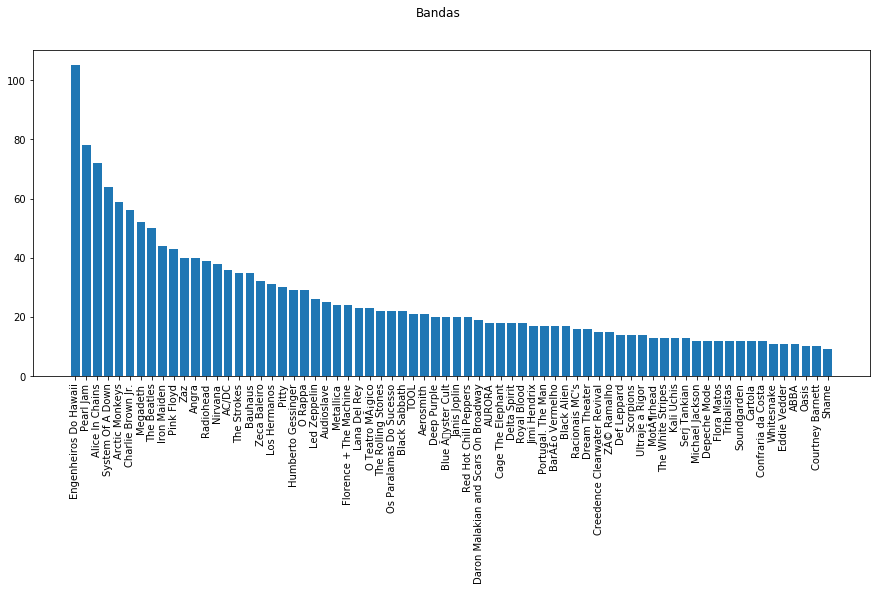

In [13]:
# plotar um gráfico para melhor visualização
names = list(playlist['Artista'].value_counts().keys())[:70]
values = list(playlist['Artista'].value_counts())[:70]

fig, axs = plt.subplots(figsize=(15,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Bandas');

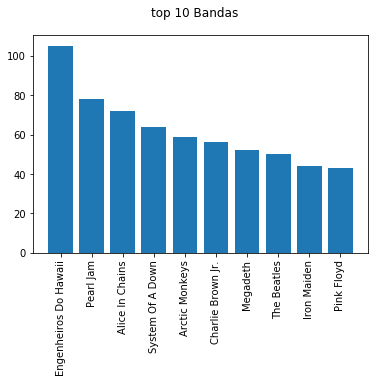

In [14]:
names = list(playlist['Artista'].value_counts().head(10).keys())
values = list(playlist['Artista'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('top 10 Bandas');

In [15]:
# fazer um dataframe com os 100 artistas mais frequentes
top100 = playlist.Artista.value_counts().to_frame()[:100]

In [16]:
# transformar o index em coluna
top100.reset_index(level=0, inplace=True)

In [17]:
# renomear as colunas
top100.columns = ['Artista', 'Quantidade de Músicas']

In [18]:
# ver os 50 primeiros
top100.head(50)

,Artista,Quantidade de Músicas
0,Engenheiros Do Hawaii,105
1,Pearl Jam,78
2,Alice In Chains,72
3,System Of A Down,64
4,Arctic Monkeys,59
5,Charlie Brown Jr.,56
6,Megadeth,52
7,The Beatles,50
8,Iron Maiden,44
9,Pink Floyd,43


In [19]:
# ver 50 últimos
top100.tail(50)

,Artista,Quantidade de Músicas
50,Def Leppard,14
51,Scorpions,14
52,Ultraje a Rigor,14
53,MotÃ¶rhead,13
54,The White Stripes,13
55,Kali Uchis,13
56,Serj Tankian,13
57,Michael Jackson,12
58,Depeche Mode,12
59,Flora Matos,12


In [20]:
top200 = playlist.Artista.value_counts().to_frame()[100:200]

In [21]:
top200.reset_index(level=0, inplace=True)

In [22]:
top200.columns = ['Artista', 'Quantidade de Músicas']

In [23]:
top200.head(50)

,Artista,Quantidade de Músicas
0,Elliott Smith,7
1,Criolo,7
2,Francesca Michielin,7
3,The Doors,7
4,Secos & Molhados,7
5,Slipknot,7
6,CÃ¡ssia Eller,7
7,Blind Guardian,7
8,Van Halen,7
9,The Cure,7


In [24]:
top200.tail(50)

,Artista,Quantidade de Músicas
50,Ira!,5
51,Ramones,5
52,Viper,5
53,Alceu ValenÃ§a,5
54,The Smiths,5
55,Lynyrd Skynyrd,5
56,Opeth,5
57,Waxahatchee,5
58,Gus & Vic,5
59,BTRX,5


In [25]:
last52 = playlist.Artista.value_counts().to_frame()[200:255]

In [26]:
last52.reset_index(level=0, inplace=True)

In [27]:
last52.columns = ['Artista', 'Quantidade de Músicas']

In [28]:
last52.head(55)

,Artista,Quantidade de Músicas
0,Boogarins,3
1,Seu Jorge,3
2,SÃ­ntese,3
3,Ana Carolina,3
4,Imagine Dragons,2
5,Eagles,2
6,John Frusciante,2
7,Rosa Neon,2
8,Rush,2
9,Fresno,2


Com isso, tenho todos os artistas da minha playlist em forma de tabela. Assim, posso ver quais artistas são menos escutados e, assim, procurar mais albums deles para escutar.

### Albums mais frequentes

In [29]:
# achar quantos albums tem na playlist
len(playlist['Album'].unique().tolist())

496

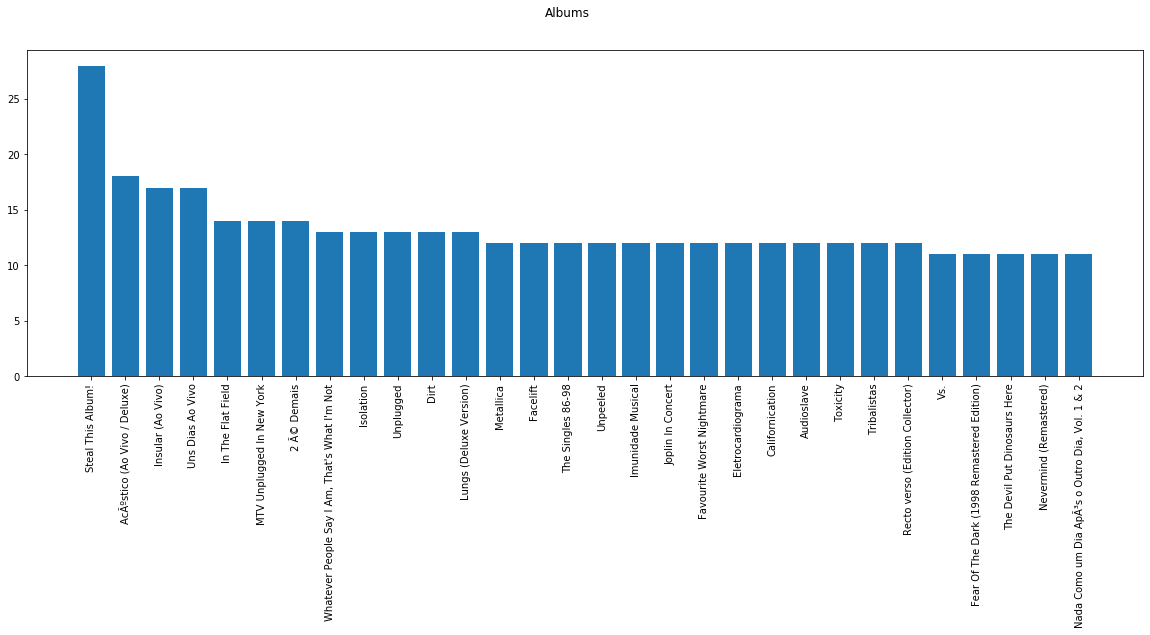

In [30]:
# plotar um gráfico com os albums que têm mais músicas na playlist, para melhor visualização
names = list(playlist['Album'].value_counts().keys())[:30]
values = list(playlist['Album'].value_counts())[:30]

fig, axs = plt.subplots(figsize=(20,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Albums');

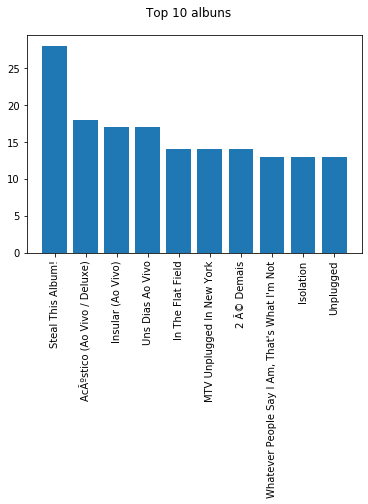

In [31]:
# grafico dos 10 albums com mais musicas na playlist
names = list(playlist['Album'].value_counts().head(10).keys())
values = list(playlist['Album'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Top 10 albuns');

### Quantas músicas foram adicionadas em cada ano

In [32]:
# Quantas músicas foram adicionadas cada ano
playlist['adicionadaData'].value_counts()

2019    1711
2018     740
2020     198
Name: adicionadaData, dtype: int64

### Quais décadas mais ouvidas

In [33]:
# pegar os dados da coluna e transformar em inteiro
converte = playlist['anoAlbum']

pd.to_numeric(converte, errors='ignore')
pd.to_numeric(converte, errors='coerce')

0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
2644    2016
2645    2016
2646    2016
2647    2016
2648    2016
Name: anoAlbum, Length: 2649, dtype: int64

In [34]:
# converter series pandas para numpy array
converte_numpy = converte.to_numpy()
converte_numpy

array(['1992', '1992', '1992', ..., '2016', '2016', '2016'], dtype=object)

In [35]:
# converter numpy object array para numpy objetc float
data_numero= np.frompyfunc(lambda x: x.replace(',',''),1,1)(converte_numpy).astype(float)

In [36]:
# transformar anos em décadas
anos = data_numero

decades = []
for each in anos:
    decade = int(np.floor(each / 10) * 10)
    decades.append(decade)

print(set(decades)) 

{2020, 1990, 1960, 2000, 1970, 2010, 1980, 1950}


In [37]:
# importar Counter para conseguir contar a array numpy
from collections import Counter
Counter(decades)

Counter({1990: 548,
         2010: 661,
         2000: 619,
         1970: 295,
         1980: 301,
         1950: 7,
         1960: 204,
         2020: 14})

### Gravadoras mais presentes

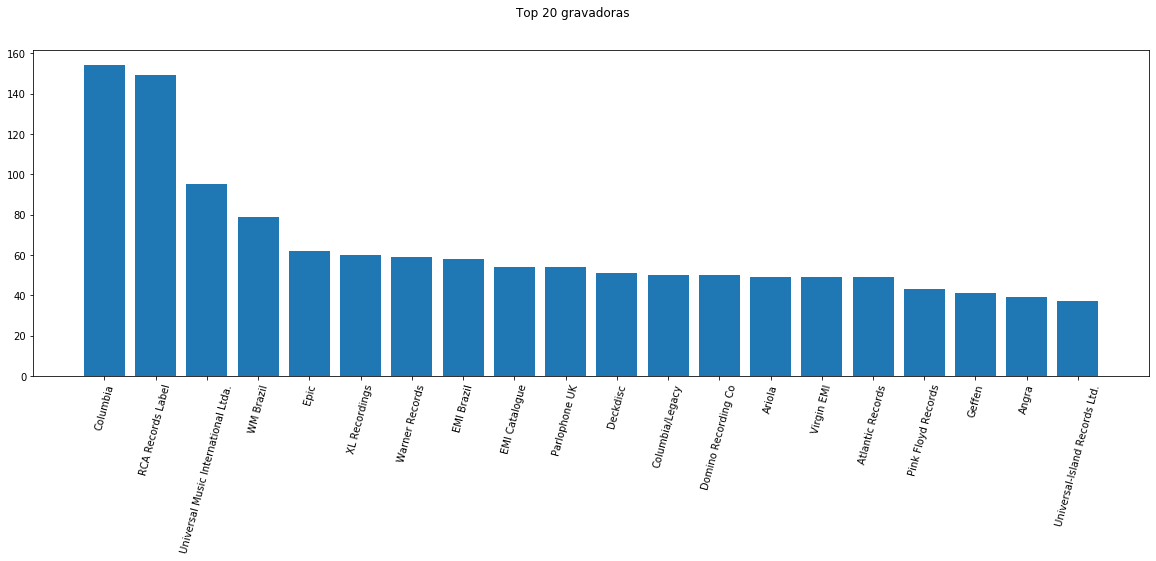

In [38]:
# plotar um gráfico com as gravadoras mais frequentes
names = list(playlist['gravadora'].value_counts().keys())[:20]
values = list(playlist['gravadora'].value_counts())[:20]

fig, axs = plt.subplots(figsize=(20,6))
axs.bar(names, values)
plt.xticks(rotation=75);
fig.suptitle('Top 20 gravadoras');

### Wordcloud

In [39]:
# instalar biblioteca wordcloud
!pip install wordcloud -q

In [40]:
all_summary = " ".join(s for s in playlist['Artista'])

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 34864


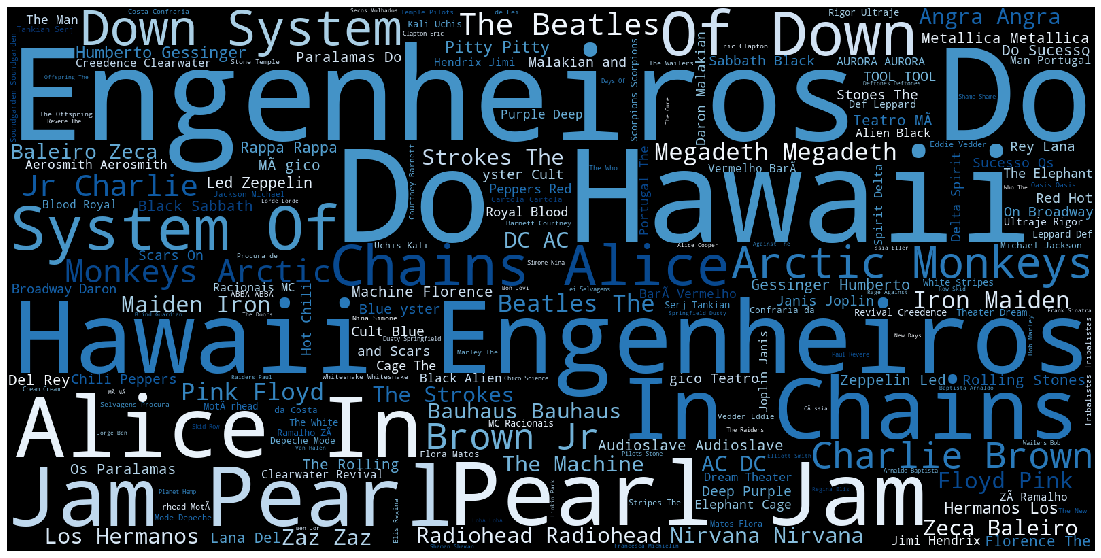

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, colormap="Blues").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("bandas_spotify_johnathan.png");